In [5]:
import tensorflow as tf           # Tensorflow
from tensorflow import keras      # Keras
import numpy as np                # Numpy
import matplotlib                 # Matplotlib

In [ ]:
# !pip install kaggle
from google.colab import files
files.upload() # Upload kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json # Change Permission 
!kaggle datasets download -d vikranthkanumuru/naruto-hand-sign-dataset

Saving kaggle.json to kaggle.json
100% 2.01G/2.02G [00:14<00:00, 106MB/s] 
100% 2.02G/2.02G [00:14<00:00, 148MB/s]


In [1]:
from PIL import Image
import glob

# Store Data in JSON format
data = {
    "train": {
        "bird":[],
        "boar":[],
        "dog":[],
        "dragon":[],
        "hare":[],
        "horse":[],
        "monkey":[],
        "ox":[]
      }, 
    "test": {
        "bird":[],
        "boar":[],
        "dog":[],
        "dragon":[],
        "hare":[],
        "horse":[],
        "monkey":[],
        "ox":[]
      }}

# Using the 'glob' library, we populate the JSON

for sign in data["train"].keys():
  data["train"][sign] = glob.glob('D:/udemy/naruto data/naruto handsign data RGB/train/' + sign +'/*.png')

for sign in data["test"].keys():
  data["test"][sign] = glob.glob('D:/udemy/naruto data/naruto handsign data RGB/test/' + sign +'/*.png')


In [2]:
data['train']["bird"]
print(len(data['train']['bird']))

100


D:/udemy/naruto data/naruto handsign data RGB/train/bird\bird0#1.png


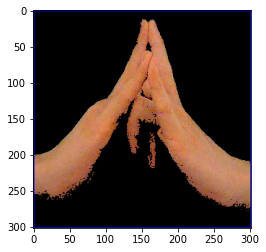

In [3]:
from matplotlib import image
from matplotlib import pyplot

# image = image.imread('Face Mask Dataset/Test/WithMask/1203.png')
filename = data["train"]["bird"][0]
print(filename)
faceimage = image.imread(filename)
pyplot.imshow(faceimage)
pyplot.show()

In [6]:
faceimage = np.array(faceimage)
faceimage.shape #this shit randomly has 4 fckin dimensions like ??? 

(302, 302, 3)

In [7]:
# Let the labels 0 and 1 denote 'with' and 'without' masks respectively
import cv2 #for resizing image 
train_labels = []
train_data_set = []
test_labels = []
test_data_set = []

In [8]:
import PIL.Image
label_counter =0
for sign in data['train'].keys():
  for pathname in data["train"][sign]:
    # readImage = image.imread(pathname)
    readImage = PIL.Image.open(pathname)
    readImage = readImage.convert('RGB') #NEED TO CONVERT FROM RGB-A TO RGB
    readImage = np.array(readImage) #THEN CONVERT BACK TO A NUMPY ARRAY
    #THEN YOU CAN USE CV2 
    resizedImage = cv2.resize(readImage,(150,150)) #i wanted to resize the image or else it might take way too long to train
    train_labels.append(label_counter) #sign
    train_data_set.append(resizedImage)
  label_counter+=1

label_counter =0
for sign in data['test'].keys():
  for pathname in data["test"][sign]:
    readImage = PIL.Image.open(pathname)
    readImage = readImage.convert('RGB')
    readImage = np.array(readImage)    
    resizedImage = cv2.resize(readImage,(150,150)) #i wanted to resize the image or else it might take way too long to train
    test_labels.append(label_counter) #sign
    test_data_set.append(resizedImage)
  label_counter+=1

In [9]:
train_data_set[:1]

[array([[[  0,   0, 255],
         [  0,   0, 255],
         [  0,   0, 255],
         ...,
         [  0,   0, 255],
         [  0,   0, 255],
         [  0,   0, 255]],
 
        [[  0,   0, 255],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0, 126]],
 
        [[  0,   0, 255],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0, 126]],
 
        ...,
 
        [[  0,   0, 255],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0, 126]],
 
        [[  0,   0, 255],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0, 126]],
 
        [[  0,   0, 255],
         [  0,   0, 126],
         [  0,   0, 126],
         ...,
         [  0,   0, 126],
  

the label for this test image is: 7
length of test dataset is: 80
the label for this train image is: 7
length of train dataset is: 830


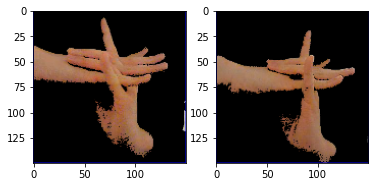

In [10]:
test_image_num = -1
train_image_num = -1

print("the label for this test image is:", test_labels[test_image_num])
print("length of test dataset is:",len(test_data_set))

print("the label for this train image is:", train_labels[train_image_num])
print("length of train dataset is:",len(train_data_set))

f, (ax1,ax2) = pyplot.subplots(1,2) 
ax1.imshow(test_data_set[test_image_num])
ax2.imshow(train_data_set[train_image_num])

pyplot.show()

In [11]:
from sklearn.utils import shuffle # helps shuffle our data 
train_data_set, train_labels = shuffle(train_data_set, train_labels)
test_data_set, test_labels = shuffle(test_data_set, test_labels) # i think technically you don't need to shuffle test set 


[7, 0, 2, 2, 3, 2, 2, 2, 5, 1]
[6, 6, 5, 0, 1, 7, 2, 4, 2, 1]


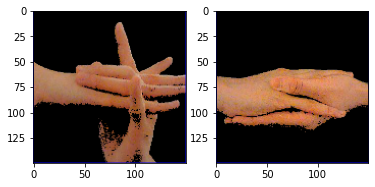

In [12]:
#testing if our shuffles worked 
print(train_labels[:10]) #first 10 elements of train set
print(test_labels[:10]) #first 10 elements of test set

f, (ax1,ax2) = pyplot.subplots(1,2) 
ax1.imshow(train_data_set[0])
ax2.imshow(test_data_set[0])

pyplot.show()


In [13]:
train_data_set = np.array(train_data_set)
train_labels = np.array(train_labels)

test_data_set = np.array(test_data_set)
test_labels = np.array(test_labels)


In [14]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels, 8)
test_labels = to_categorical(test_labels, 8)


In [15]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [16]:
print(type(test_data_set[0]))
print(type(train_data_set[1]))
print(train_data_set[0].shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(150, 150, 3)


In [17]:
from keras.layers import Convolution2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras import optimizers
from keras import layers
from keras.utils import plot_model
#random model i pulled off the internet 
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(150 ,150, 3))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu', input_shape = (64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(units = 512, activation = 'relu'))
model.add(layers.Dense(units = 8, activation = 'softmax')) 
model.compile(loss = 'categorical_crossentropy',  #binary classification problem (mask or no mask)
              optimizer = 'adam',
              metrics = ['accuracy'])

In [18]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       7

In [19]:
history = model.fit(np.array(train_data_set),  #fitting our model 
                         train_labels, 
                         batch_size = 64, 
                         epochs = 5, #i only put 2 epochs because I didn't want to wait, can be a lot more epochs 
                         validation_split =0.1) 

Epoch 1/5
12/12 [==============================] - 5s 394ms/step - loss: 34.8933 - accuracy: 0.2932 - val_loss: 1.6523 - val_accuracy: 0.4217
Epoch 2/5
12/12 [==============================] - 4s 367ms/step - loss: 0.9324 - accuracy: 0.7523 - val_loss: 0.3124 - val_accuracy: 0.8916
Epoch 3/5
12/12 [==============================] - 4s 366ms/step - loss: 0.1693 - accuracy: 0.9505 - val_loss: 0.1189 - val_accuracy: 0.9639
Epoch 4/5
12/12 [==============================] - 4s 366ms/step - loss: 0.0401 - accuracy: 0.9880 - val_loss: 0.0742 - val_accuracy: 0.9759
Epoch 5/5
12/12 [==============================] - 5s 392ms/step - loss: 0.0228 - accuracy: 0.9933 - val_loss: 0.0430 - val_accuracy: 0.9880


In [27]:
results = model.evaluate(test_data_set,test_labels, batch_size = 5) # testing our model 

16/16 [==============================] - 0s 18ms/step - loss: 0.1074 - accuracy: 0.9750


In [28]:
model.save("my model") # saving our model

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: my model\assets


In [29]:
arr = np.array([1,2,3,4])
print(arr[2])

3


In [30]:
print(arr(np.argmax(arr))) #can't do this, need to i guess separate it

TypeError: 'numpy.ndarray' object is not callable